In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = 15,15

In [35]:
from jupyterthemes import jtplot
jtplot.style(figsize=(15,15))

# Import

In [2]:
airports = pd.read_csv('airlines/airports.csv')

In [3]:
carriers = pd.read_csv('airlines/carriers.csv')

In [4]:
planes = pd.read_csv('airlines/plane-data.csv')

In [5]:
oldData = pd.read_csv('airlines/1998.csv')

In [6]:
newData = pd.read_csv('airlines/2006.csv')

In [7]:
byCarrier = pd.read_csv('Group/byCarr.csv')
byCord = pd.read_csv('Group/byCord.csv')
byModel = pd.read_csv('Group/bymodel.csv')
byManu = pd.read_csv('Group/bymyear.csv')
byState = pd.read_csv('Group/byState.csv')

In [8]:
byCarrier.head()

,year,carrier,num_flight,num_cancl,r_cancl,num_dely,r_dely,avg_dely
0,1998,HP,198592,4479,0.022056,83654,0.421235,13.909276
1,2006,DL,498391,7695,0.015205,194214,0.389682,8.105419
2,2006,TZ,19375,227,0.011580,6651,0.343277,12.860129
3,1998,AS,148710,3510,0.023059,54260,0.364871,9.258960
4,1998,US,678816,17214,0.024732,292143,0.430371,7.403629


In [9]:
byCord.head()

,lat,long,num_flight,num_cancl,r_cancl,num_dely,r_dely,avg_dely
0,26.175833,-98.238611,7931,83,0.010357,2050,0.258479,6.019544
1,28.102750,-80.645806,4601,72,0.015408,1335,0.290154,5.748750
2,28.428889,-81.316028,208983,1955,0.009268,78435,0.375318,7.785739
3,31.259028,-81.466306,961,39,0.039000,344,0.357960,11.792924
4,32.692849,-83.649211,1040,51,0.046746,263,0.252885,10.654808


In [10]:
byModel.head()

,manufacturer,model,num_flight,num_cancl,r_cancl,num_dely,r_dely,avg_dely
0,NaN,NaN,4948938,214314,0.041508,2021250,0.408421,9.306262
1,AEROSPATIALE,AS 355F1,716,0,0.000000,253,0.353352,6.298883
2,AIRBUS,A319-131,6604,5,0.000757,2311,0.349939,10.543004
3,AIRBUS,A320-232,122879,123,0.001000,52111,0.424084,9.681215
4,AIRBUS INDUSTRIE,A319-112,48674,37,0.000760,17826,0.366232,5.410137


In [11]:
byManu.head()

,manu_year,num_flight,num_cancl,r_cancl,num_dely,r_dely,avg_dely
0,NaN,5119165,216260,0.040533,2086015,0.407491,9.350600
1,0.0,4315,0,0.000000,1775,0.411356,9.457706
2,1956.0,437,0,0.000000,179,0.409611,9.931350
3,1962.0,2720,0,0.000000,1004,0.369118,7.316544
4,1968.0,67061,1678,0.024411,22657,0.337857,7.315235


In [12]:
byState.head()

,year,state,num_flight,num_cancl,r_cancl,num_dely,r_dely,avg_dely
0,1998,AL,30953,655,0.020723,10088,0.325913,6.905114
1,1998,AZ,185984,3337,0.017626,85338,0.458846,12.320431
2,1998,CT,25746,699,0.026432,9107,0.353725,5.336635
3,1998,GA,257363,5057,0.019271,141716,0.550646,9.374615
4,1998,MD,68919,1064,0.015204,26440,0.383639,7.663286


In [13]:
airports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 7 columns):
iata       3376 non-null object
airport    3376 non-null object
city       3364 non-null object
state      3364 non-null object
country    3376 non-null object
lat        3376 non-null float64
long       3376 non-null float64
dtypes: float64(2), object(5)
memory usage: 184.7+ KB


In [14]:
carriers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1491 entries, 0 to 1490
Data columns (total 2 columns):
Code           1490 non-null object
Description    1491 non-null object
dtypes: object(2)
memory usage: 23.4+ KB


In [15]:
planes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5029 entries, 0 to 5028
Data columns (total 9 columns):
tailnum          5029 non-null object
type             4480 non-null object
manufacturer     4480 non-null object
issue_date       4480 non-null object
model            4480 non-null object
status           4480 non-null object
aircraft_type    4480 non-null object
engine_type      4480 non-null object
year             4480 non-null object
dtypes: object(9)
memory usage: 353.7+ KB


In [16]:
oldData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5384721 entries, 0 to 5384720
Data columns (total 29 columns):
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
DepTime              float64
CRSDepTime           int64
ArrTime              float64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               int64
TaxiOut              int64
Cancelled            int64
CancellationCode     float64
Diverted             int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtypes: float64(13), int64(12), object(4)
memory usage: 1.2+ GB


In [17]:
newData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7141922 entries, 0 to 7141921
Data columns (total 29 columns):
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
DepTime              float64
CRSDepTime           int64
ArrTime              float64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               int64
TaxiOut              int64
Cancelled            int64
CancellationCode     object
Diverted             int64
CarrierDelay         int64
WeatherDelay         int64
NASDelay             int64
SecurityDelay        int64
LateAircraftDelay    int64
dtypes: float64(7), int64(17), object(5)
memory usage: 1.5+ GB


# Wrangling

In [18]:
airports.head(5)

,iata,airport,city,state,country,lat,long
0,00M,Thigpen,Bay Springs,MS,USA,31.953765,-89.234505
1,00R,Livingston Municipal,Livingston,TX,USA,30.685861,-95.017928
2,00V,Meadow Lake,Colorado Springs,CO,USA,38.945749,-104.569893
3,01G,Perry-Warsaw,Perry,NY,USA,42.741347,-78.052081
4,01J,Hilliard Airpark,Hilliard,FL,USA,30.688012,-81.905944


In [19]:
oldCancel = oldData[oldData['Cancelled'] == 1]
newCancel = newData[newData['Cancelled'] == 1]

In [20]:
oldCancel.head(5)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
37,1998,1,23,5,NaN,1250,NaN,1410,WN,639,...,0,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN
268,1998,1,5,1,NaN,1510,NaN,1730,HP,2402,...,0,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN
273,1998,1,10,6,NaN,1514,NaN,1730,HP,2402,...,0,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN
283,1998,1,20,2,NaN,1514,NaN,1730,HP,2402,...,0,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN
304,1998,1,17,6,NaN,710,NaN,931,HP,2404,...,0,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN


In [21]:
newCancel.head(5)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
11,2006,1,11,3,NaN,1725,NaN,1845,US,69,...,0,0,1,A,0,0,0,0,0,0
52,2006,1,11,3,NaN,1945,NaN,2127,US,2049,...,0,0,1,C,0,0,0,0,0,0
70,2006,1,11,3,NaN,1900,NaN,2011,US,2141,...,0,0,1,C,0,0,0,0,0,0
74,2006,1,11,3,NaN,1630,NaN,1759,US,233,...,0,0,1,C,0,0,0,0,0,0
99,2006,1,11,3,NaN,1730,NaN,1855,US,1651,...,0,0,1,C,0,0,0,0,0,0


In [22]:
newCancel.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

# Plots

## 1998

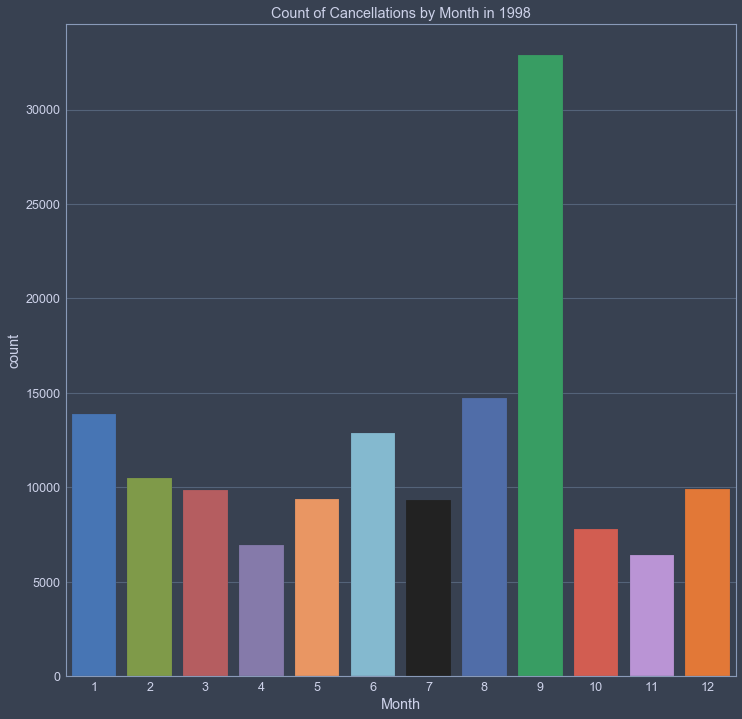

In [36]:
sns.countplot(data=oldCancel, x='Month').set_title("Count of Cancellations by Month in 1998")
plt.show()

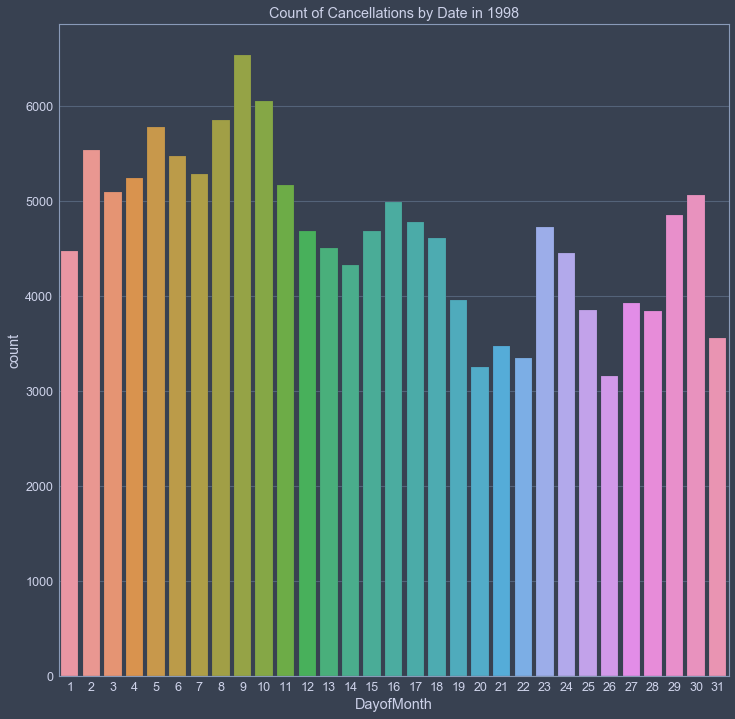

In [37]:
sns.countplot(data=oldCancel, x='DayofMonth').set_title("Count of Cancellations by Date in 1998")
plt.show()

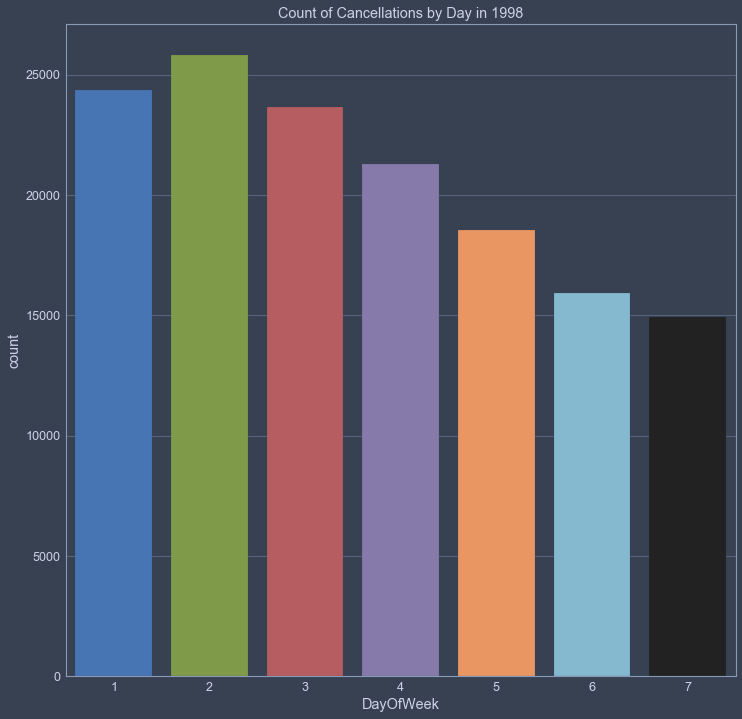

In [38]:
sns.countplot(data=oldCancel, x='DayOfWeek').set_title("Count of Cancellations by Day in 1998")
plt.show()

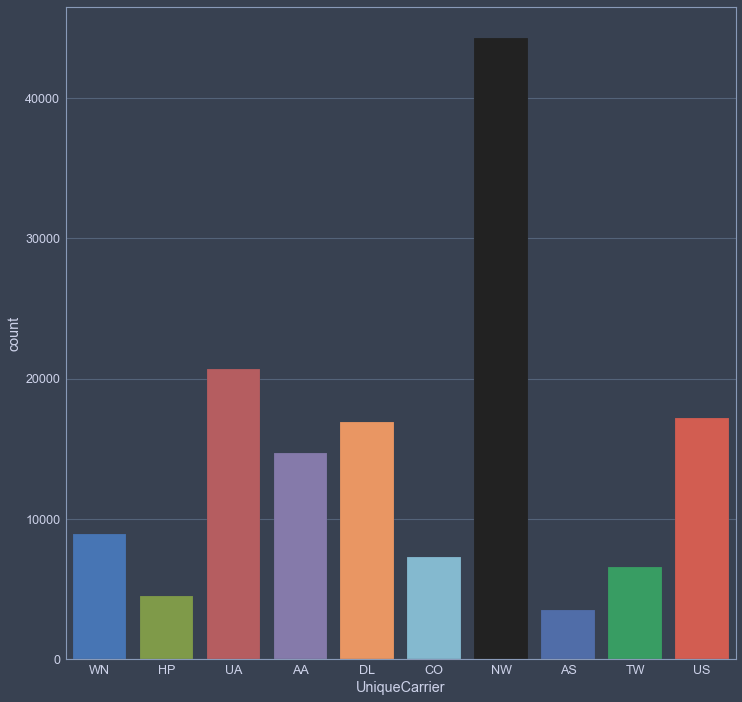

In [39]:
sns.countplot(data=oldCancel, x='UniqueCarrier')
plt.show()

## 2006

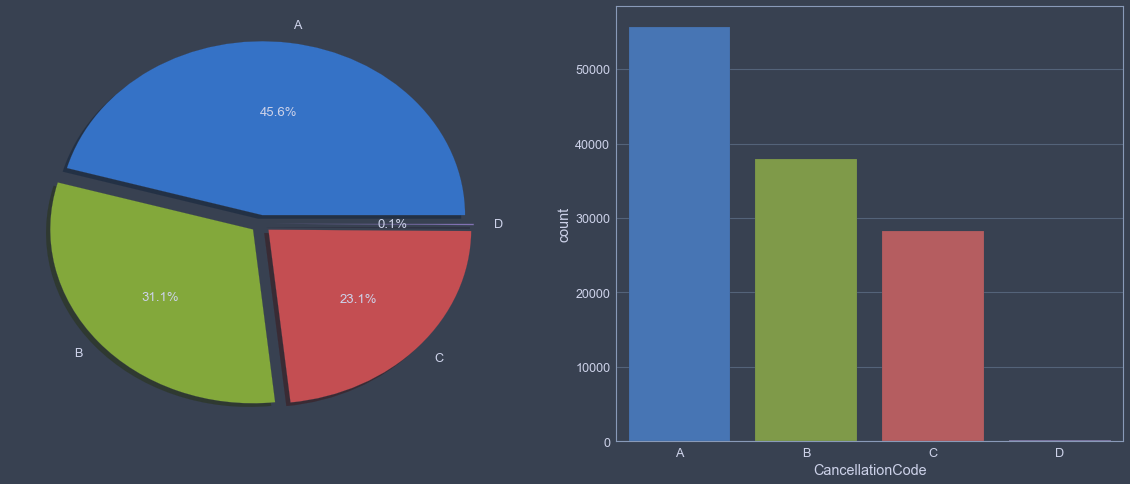

A = carrier, B = weather, C = NAS, D = security


In [40]:
f,ax=plt.subplots(1,2,figsize=(20,8))

newCancel['CancellationCode'].value_counts().plot.pie(explode=[0.05,0.05,0.05,0.05],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_ylabel('')
sns.countplot('CancellationCode', order = newCancel['CancellationCode'].value_counts().index, data=newCancel, ax=ax[1])
plt.show()


print('A = carrier, B = weather, C = NAS, D = security')

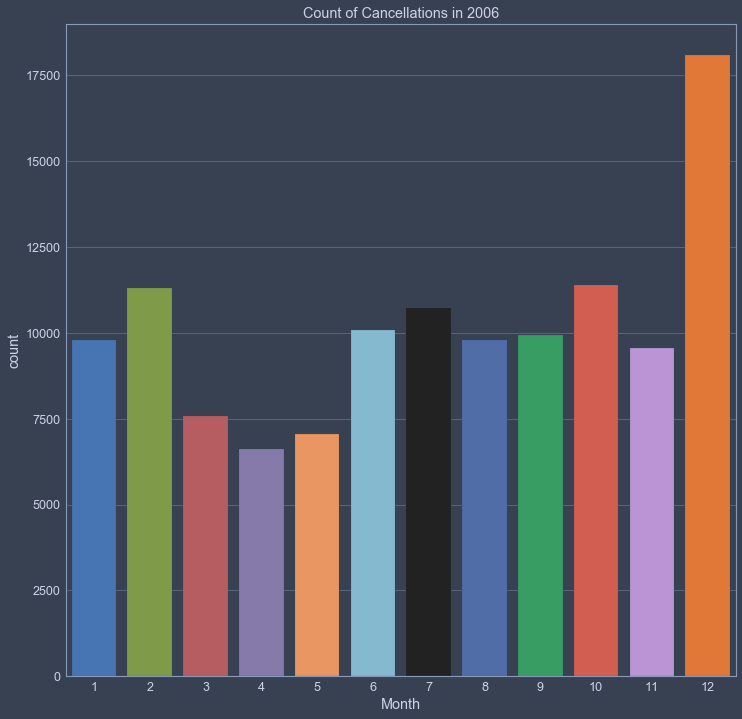

In [41]:
sns.countplot(data=newCancel, x='Month').set_title("Count of Cancellations in 2006")
plt.show()

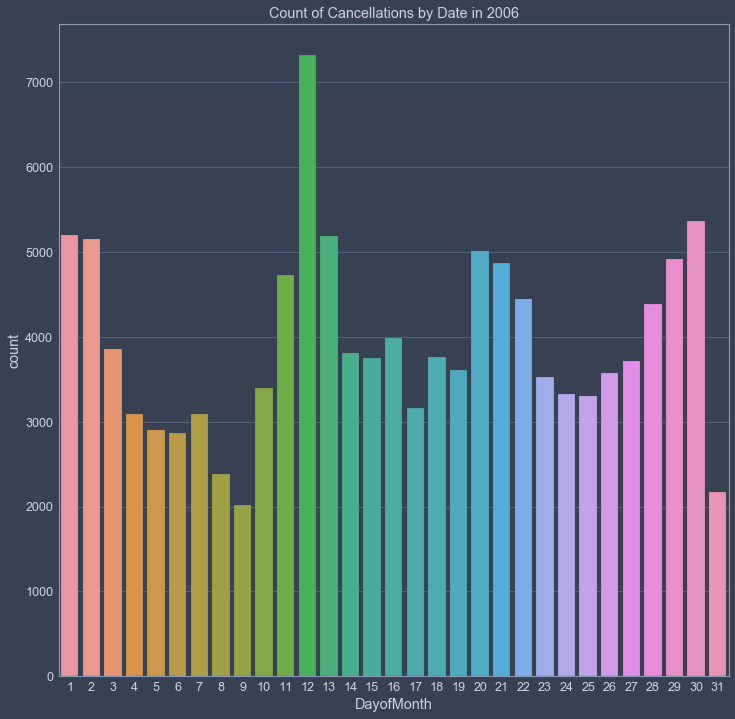

In [42]:
sns.countplot(data=newCancel, x='DayofMonth').set_title("Count of Cancellations by Date in 2006")
plt.show()

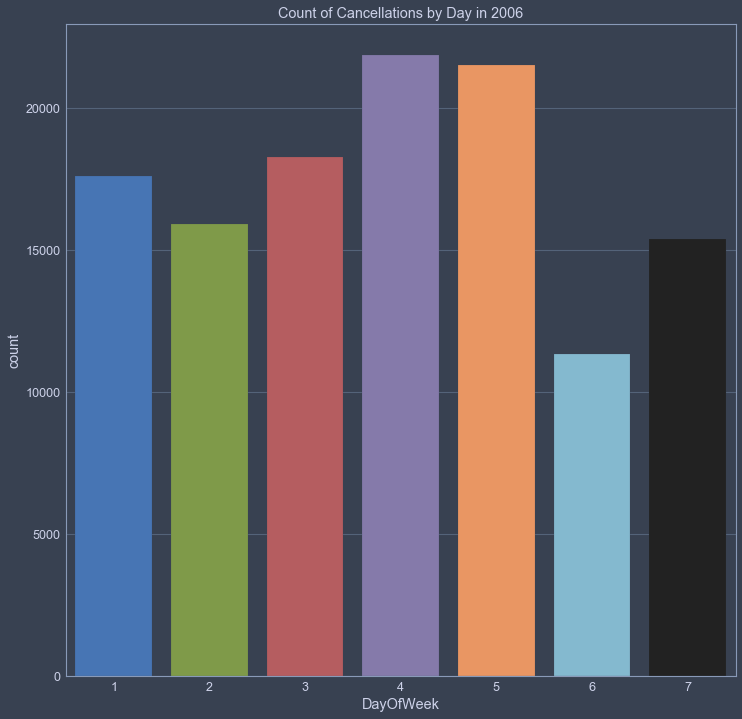

In [43]:
sns.countplot(data=newCancel, x='DayOfWeek').set_title("Count of Cancellations by Day in 2006")
plt.show()

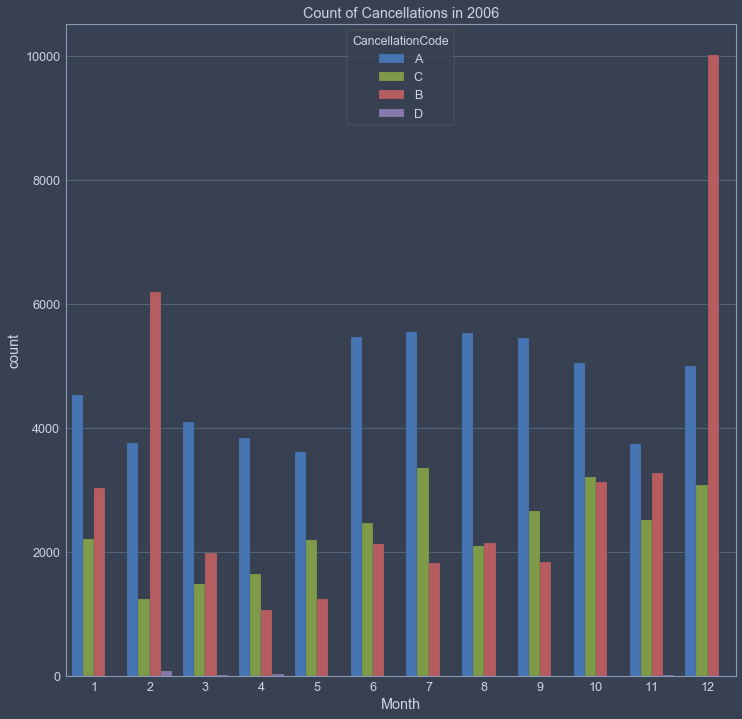

In [44]:
sns.countplot(data=newCancel, x='Month', hue="CancellationCode").set_title("Count of Cancellations in 2006")
plt.show()

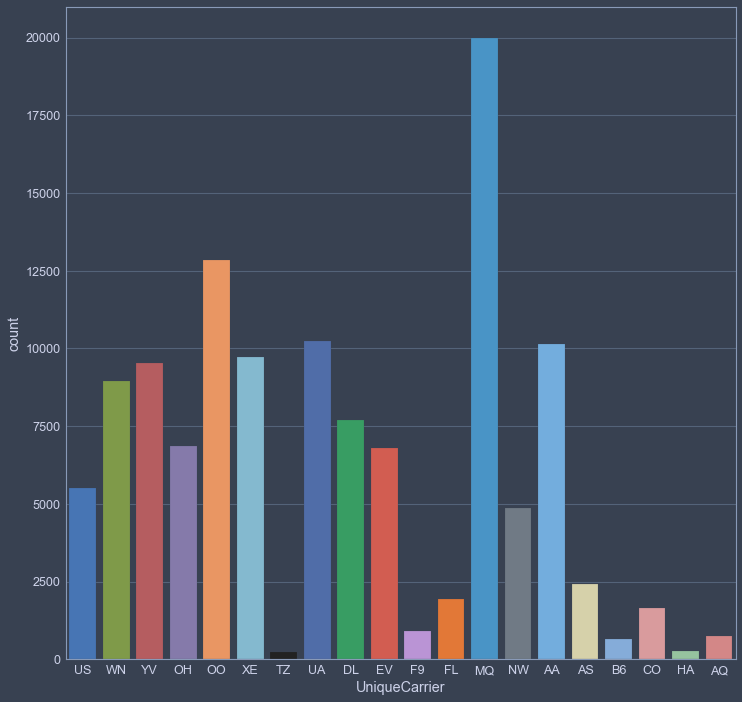

In [45]:
sns.countplot(data=newCancel, x='UniqueCarrier')
plt.show()

# Rate of Cancellation by Carrier

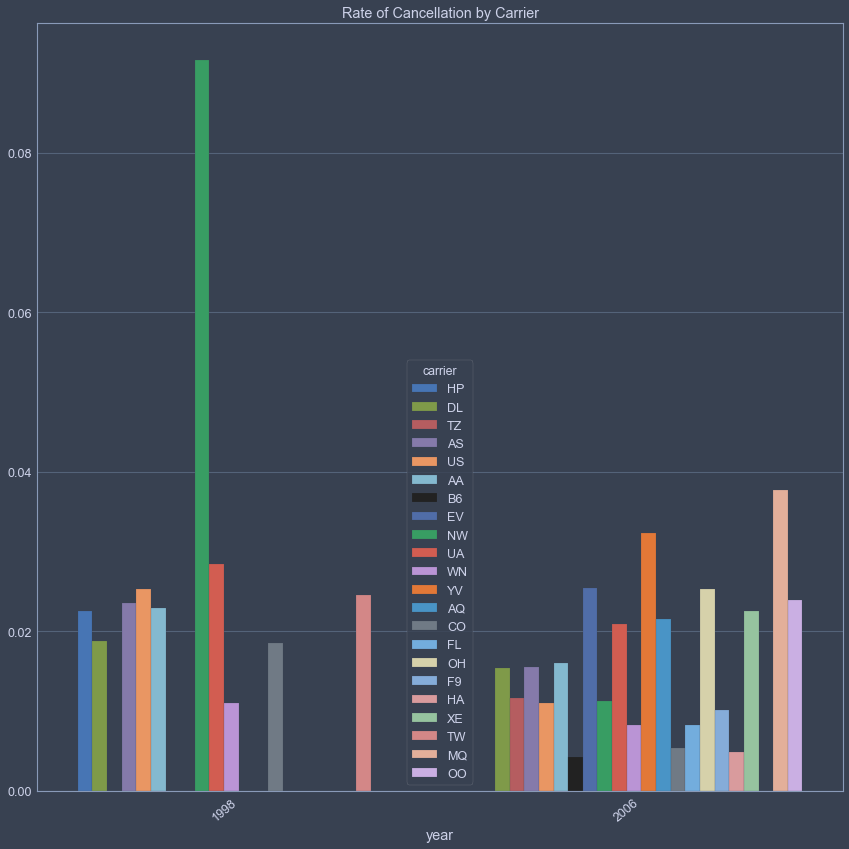

In [48]:
cancelRateCarrier = sns.barplot(data = byCarrier, x = 'year', y= byCarrier['num_cancl']/byCarrier['num_flight'] , 
                                        ci =None , hue = 'carrier')
cancelRateCarrier.set_title('Rate of Cancellation by Carrier')
cancelRateCarrier.set_xticklabels(cancelRateCarrier.get_xticklabels(), 
                                          rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [66]:
byManu.head()

,manu_year,num_flight,num_cancl,r_cancl,num_dely,r_dely,avg_dely
0,NaN,5119165,216260,0.040533,2086015,0.407491,9.350600
1,0.0,4315,0,0.000000,1775,0.411356,9.457706
2,1956.0,437,0,0.000000,179,0.409611,9.931350
3,1962.0,2720,0,0.000000,1004,0.369118,7.316544
4,1968.0,67061,1678,0.024411,22657,0.337857,7.315235


In [65]:
byManu['manu_year'].unique()

array([  nan,    0., 1956., 1962., 1968., 1974., 1980., 1986., 1992.,
       1998., 2004., 1957., 1963., 1969., 1975., 1987., 1993., 1999.,
       2005., 1964., 1970., 1976., 1982., 1988., 1994., 2000., 2006.,
       1959., 1965., 1971., 1977., 1983., 1989., 1995., 2001., 2007.,
       1966., 1972., 1978., 1984., 1990., 1996., 2002., 1967., 1973.,
       1979., 1985., 1991., 1997., 2003.])

No handles with labels found to put in legend.


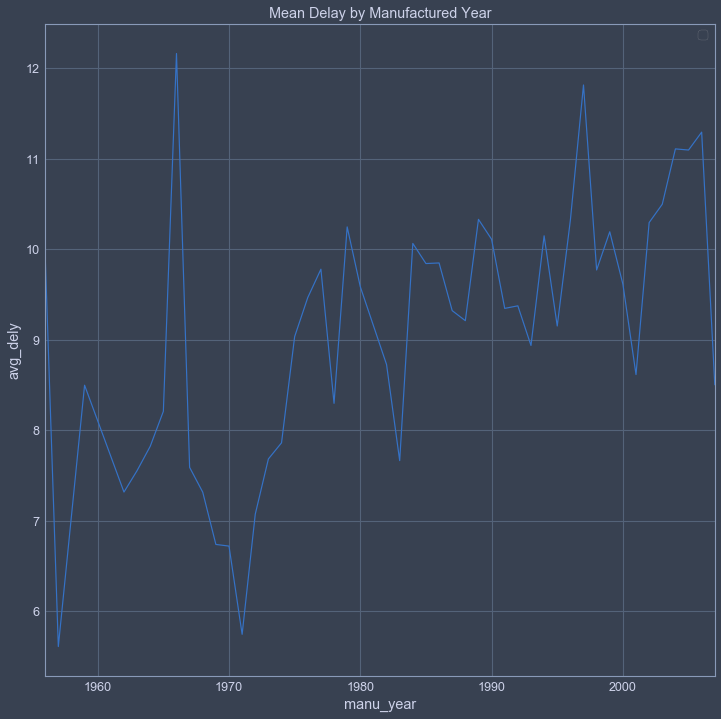

In [59]:
delayByManuYear = sns.lineplot(data = byManu, x = 'manu_year',y= 'avg_dely', ci =None)
delayByManuYear.set_title('Mean Delay by Manufactured Year')
# plt.axvline(1997, 0, color='r', linestyle='--', lw=2, label="IMF Crisis")
# plt.axvline(2002, 0, color='w', linestyle='--', lw=2, label="2002 World Cup")
# plt.axvline(2008, 0, color='b', linestyle='--', lw=2, label="Global Financial Crisis")
# plt.axvline(2014, 0, color='y', linestyle='--', lw=2, label="Sinking of Sewol Ship")
plt.xlim(1956,2007)
plt.legend()
plt.show()

In [64]:
byManu[byManu['avg_dely'] == byManu['avg_dely'].max()]

,manu_year,num_flight,num_cancl,r_cancl,num_dely,r_dely,avg_dely
36,1966.0,1556,14,0.008917,498,0.320051,12.162596


# Map Plot for Cancellation Rate